<h3>Random Number Generator, and how to estimate pi</h3>

In [1]:
import matplotlib.pyplot as plt
import numpy as np

To calculate a random number the next formula is being used:<br>
*Xi+1 =  (a.Xi + c) mod m*

In [2]:
def uniform_rng(steps,a,c,m,begin_x,show_his=False):
    x=begin_x
    lst=[]
    for i in range(steps):
        x=(a*x+c)%m
        lst.append(x)
    if show_his:
        plt.hist([i for i in lst],bins=50)
        plt.show()
    return x
        

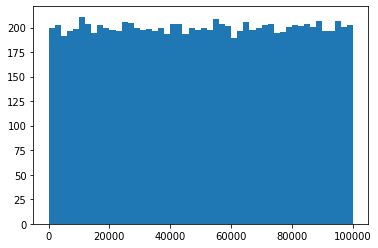

51000

In [3]:
uniform_rng(10000,421,325,100000,1000,show_his=True)

Here we see the frequentie of each value of m. It seems to be uniform, but of course, because it's random, values are not all excectly as common as others. To reduce the fluctuation we increase the amount of steps. See below.

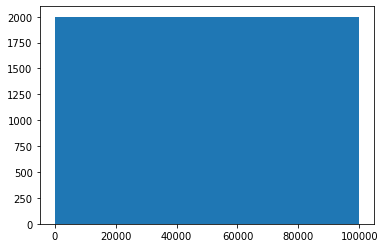

1000

In [4]:
uniform_rng(100000,421,325,100000,1000,show_his=True)

Now we can estimate a random integer with max *m*, we can also generate random coordinates with max 1 by deviding every value by m. Now we can use the random coordinates to estimate pi. 

The surface of a square is (2r)^2, given that r is the radius of a circle that fits perfectly in a square. The surface of a circle (fitted in a sqaure) is pi times r^2. So to test the value of pi, we look at the surface of a circle with r=1. In that case the surface should be equal to pi. We estimate the surface by obtaining random coordinates 0<x<1 and 0<y<1. To decide wheter the coordinates are laying in the circle or outside the circle we look at the formula for half a circle.<br>
x^2+y^2<1 given x and y are random variables. <br>

In [5]:
def circle(steps,x,y):
    lst=[]
    for i in range(steps):
        x=uniform_rng(10000,421,325,100000,x,show_his=False)
        y=uniform_rng(10000,421,325,100000,y,show_his=False)
        lst.append(((x/100000)**2+(y/100000)**2)<1)
    return lst

Now by deviding the amount of times a random coordinate is laying into the circle by the amount of coordinates are given, we can calculate the chance of a point being in the circle. This is equal to the surface of a circle devided by the surface of a sqaure. We know the surface of the square is 1, because our coordinates are between 0 and 1. So that means: <br>
surface of a circle = points in the circle / amount of points

In [6]:
lst_random=circle(100,0.8,0.7)
pi=(sum(lst_random)/len(lst_random))*4
pi

3.08

Increasing the amount of steps (or amount of coordinates) we get a more accurate estimation of pi...

In [ ]:
lst_random=circle(1000000,0.8,0.7)
pi=(sum(lst_random)/len(lst_random))*4
pi

In [8]:
from scipy.stats import norm

In [13]:
norm.ppf(0.9999,loc=1, scale=1)

4.719016485455709

In [ ]:
def uniform_to_normal(lst):
    new_lst=[]
    for x in lst:
        x=x/max(lst)
        new_x=norm.ppf(x,loc=1,scale=1)
        new_lst.append(new_x)
    if show_his:
        plt.hist([i for i in new_lst],bins=50)
        plt.show()
    